#### Participation - Week 4
## CSCI 4622 - 2024 Fall

### (Exploring Trees and Forests)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.tree
import sklearn.ensemble
import sklearn.datasets
import sklearn.metrics

__STEP 1: Use the last 5 digits of your buffone card ID number as your random state seed in the following cell__

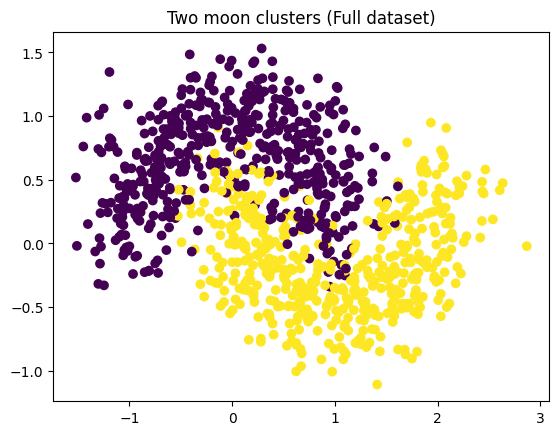

In [25]:
X, y = sklearn.datasets.make_moons(n_samples=1000, noise=0.25, random_state=78578) #TODO: Change random_state to the last 5 digits of your BuffOne card
X_train, y_train = X[:700], y[:700]
X_test, y_test = X[700:], y[700:]
plt.title("Two moon clusters (Full dataset)")
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

We have data!

Below, we'll be using our Tree (sent in as "model") and the show_decision_surface function from the homework's helper file to show how we would predict any points in space given the input data.

In [26]:
def show_decision_surface(model):
    """
    Helper function to visualize the decision surface of model
    :param model: Initialized KNNClassifier
    :return: None
    """
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    x_grid = np.arange(x_min, x_max, 0.1)
    y_grid = np.arange(y_min, y_max, 0.1)
    xx, yy = np.meshgrid(x_grid, y_grid)
    r1, r2 = xx.reshape(-1,1), yy.reshape(-1,1)
    grid = np.hstack((r1,r2))
    y_hat = model.predict(grid)
    zz = y_hat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='PiYG')
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

__STEP 2.__
Explore some hyperparameters for a decision tree
 - max_depth: 1, 2, 5, 10, None

See the SKLearn documentation for further details: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

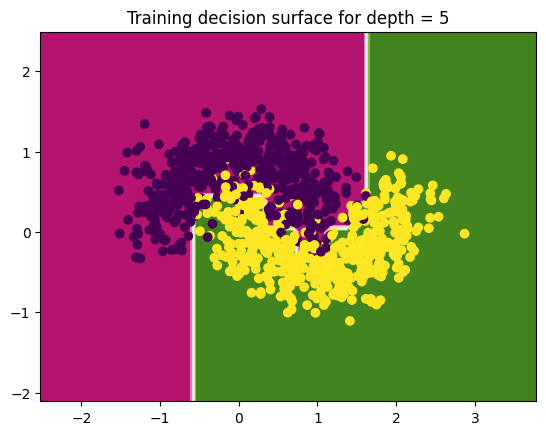

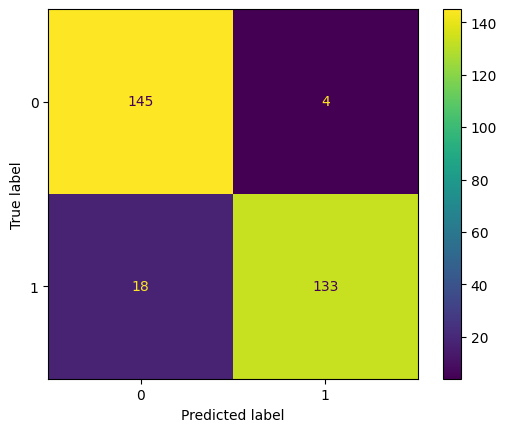

In [47]:
#TODO: Try different Ks
crit = "entropy"
depth = 5
split = 2
model = sklearn.tree.DecisionTreeClassifier(criterion = crit, max_depth = depth, min_samples_split = split)
model = model.fit(X_train, y_train)
plt.title("Training decision surface for depth = {}".format(depth))
show_decision_surface(model)
y_pred = model.predict(X_test)
conf = sklearn.metrics.confusion_matrix(y_test, y_pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(conf)
disp.plot()
plt.show()

#END

#### STEP 2 WRITEUP

1) Which hyperparameters get you the best accuracy?

The best hyperparamter was when max_depth was set to $5$ because it only got a (0,1) of 4 and (1,0) of 18, combining together, we have only missed 22 labels which is the least among the other hyperparamters.

#TODO: STEP 2 Response here


__STEP 3.__
Explore some hyperparameters for a Random Forest
 - n_estimators: 2, 5, 10, 30, 100

See the SKLearn documentation for further details: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

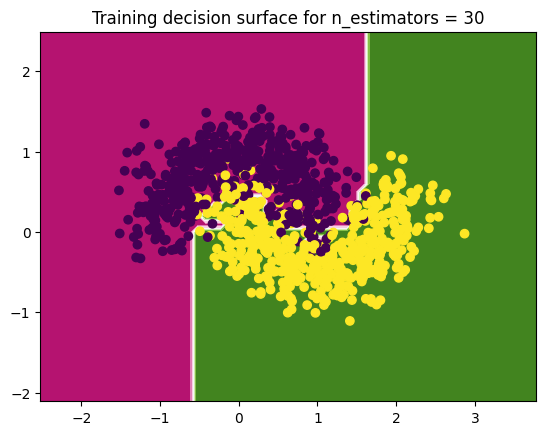

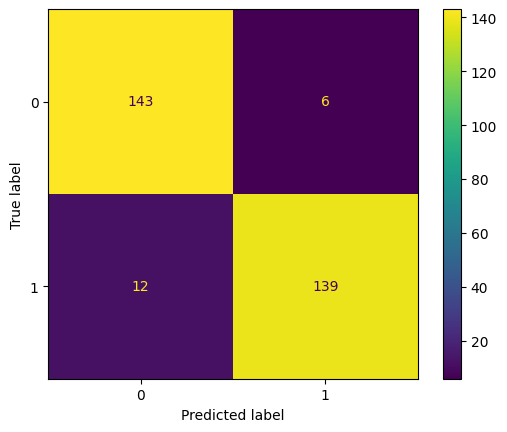

In [48]:
count = 30
model = sklearn.ensemble.RandomForestClassifier(n_estimators = count)
model = model.fit(X_train, y_train)
plt.title("Training decision surface for n_estimators = {}".format(count))
show_decision_surface(model)
y_pred = model.predict(X_test)
conf = sklearn.metrics.confusion_matrix(y_test, y_pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(conf)
disp.plot()
plt.show()


#### STEP 3 WRITEUP

1) Which hyperparameters get you the best accuracy?

#TODO: STEP 3 Response here

The best hypterparamter was when the n_estimators equal to 30 because on avergae it misses the least amount of labels among the other hypterparaters.